In [73]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
import torchvision
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import pandas as pd
import os
import sys
import copy
import time

def display_image_in_actual_size(img):
    
    dpi = 80
    #im_data = plt.imread(im_path)
    height, width, *_ = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize,frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img, cmap='gray')

    plt.show()

67.5 1.5489798
58.0 0.08726646
-367.0 3.080506
389.0 1.579523
cpu
Train size:  (42000, 785)
Test size:  (28000, 784)
Mean:  0.13101533792088266
Std:  0.3085401559245608
Train size:  (33437, 785)
Val size:  (8563, 785)
Test size:  (28000, 784)
Training data sanity check
tensor(-0.4246)
tensor(2.8164)
tensor(0.0188)
tensor(0.9640)
9
Validation data sanity check
tensor(-0.4246)
tensor(2.8164)
tensor(-0.0726)
tensor(0.9183)
3
-0.42462975
2.8164394
-0.00072914147
0.99925727
X_TEST torch.FloatTensor torch.Size([28000, 1, 28, 28])
Prediction tensor([2, 0, 9,  ..., 3, 9, 2])


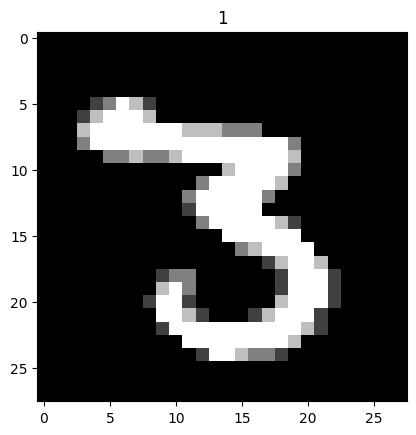

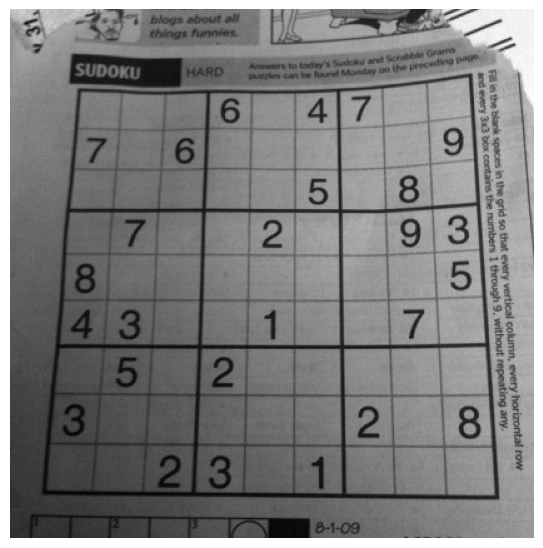

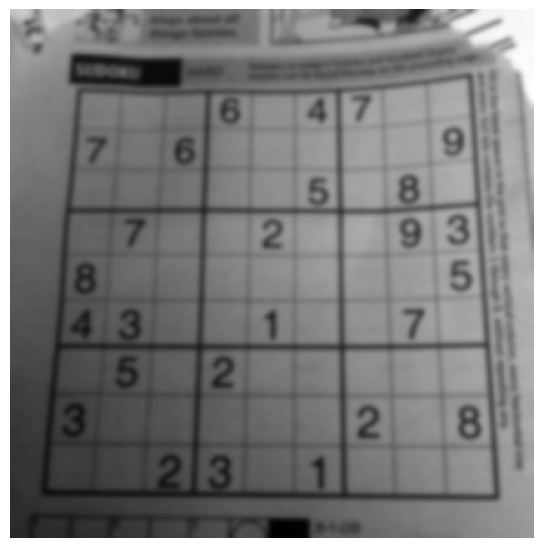

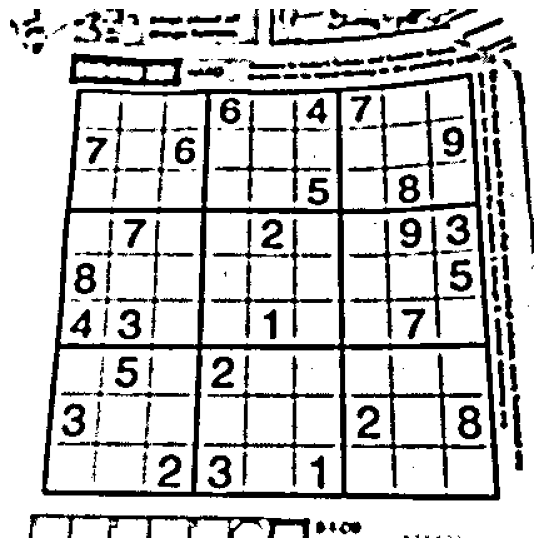

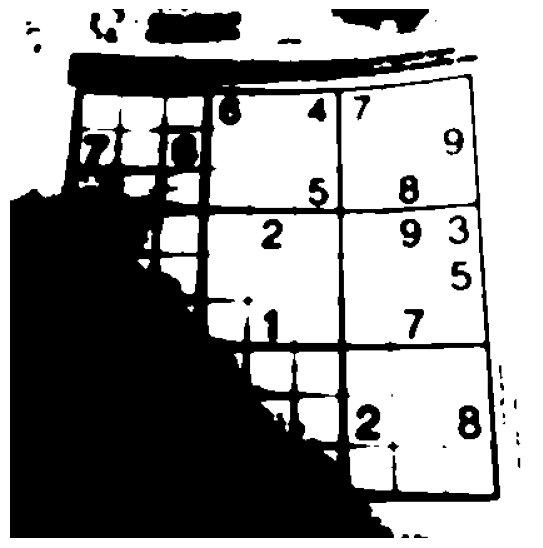

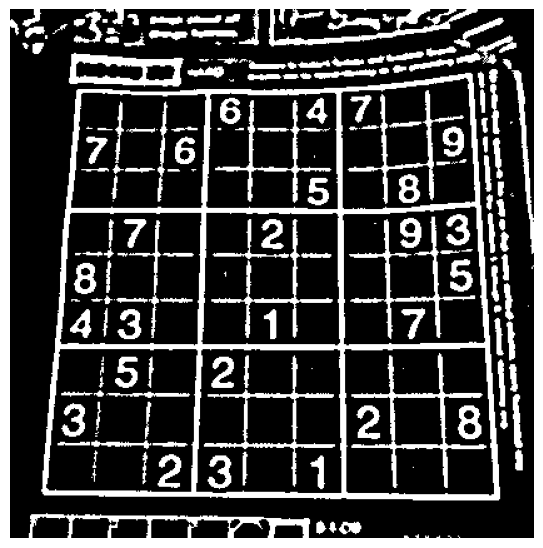

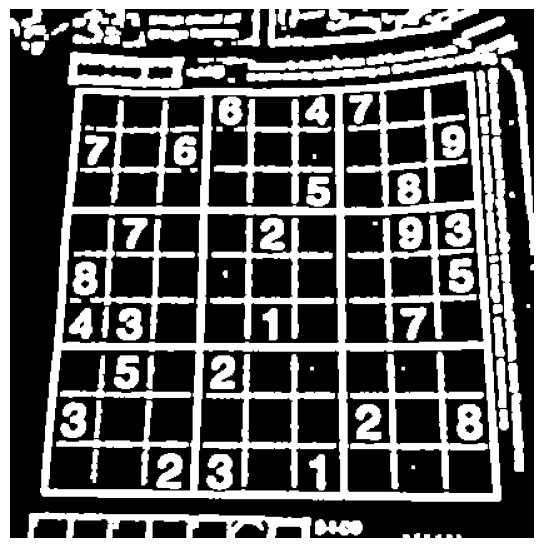

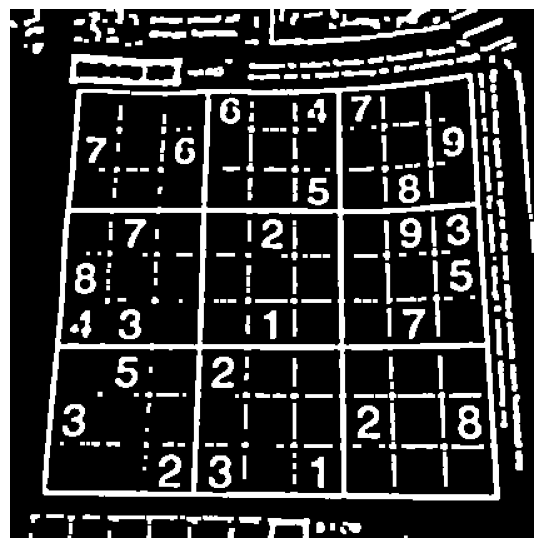

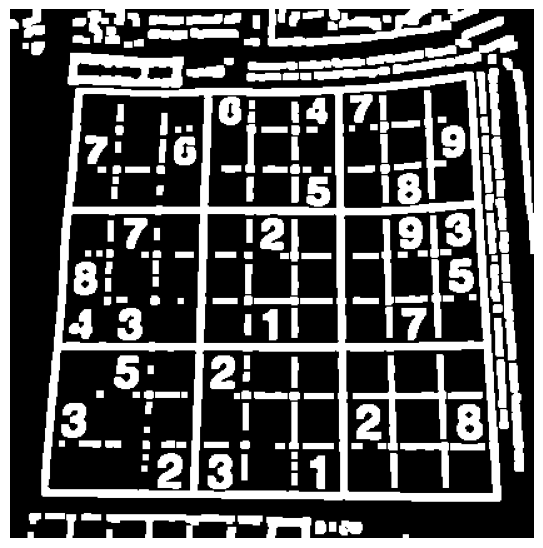

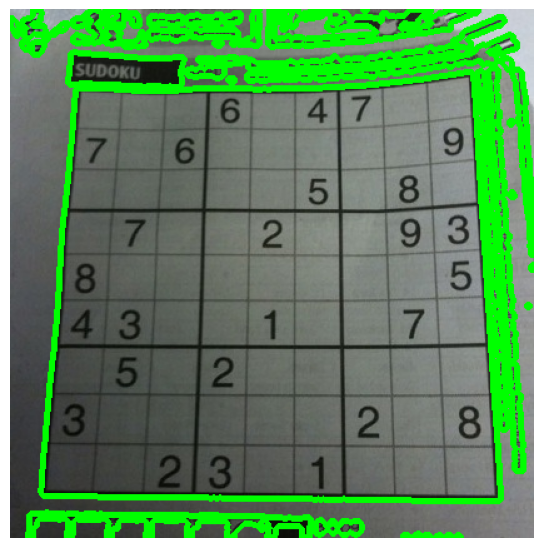

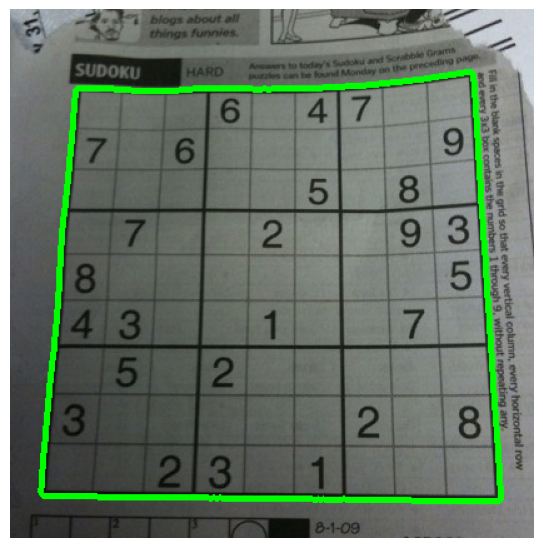

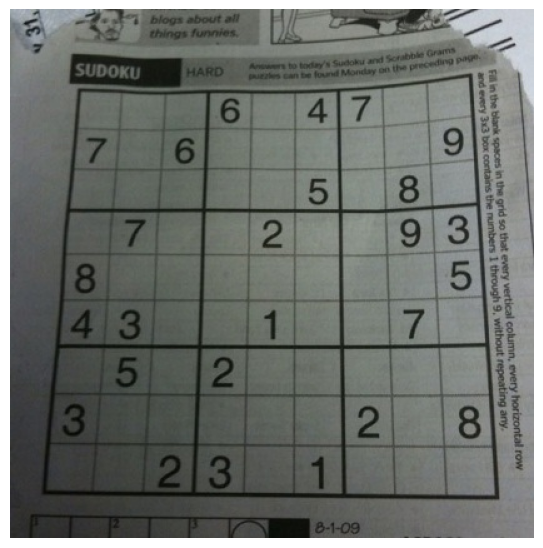

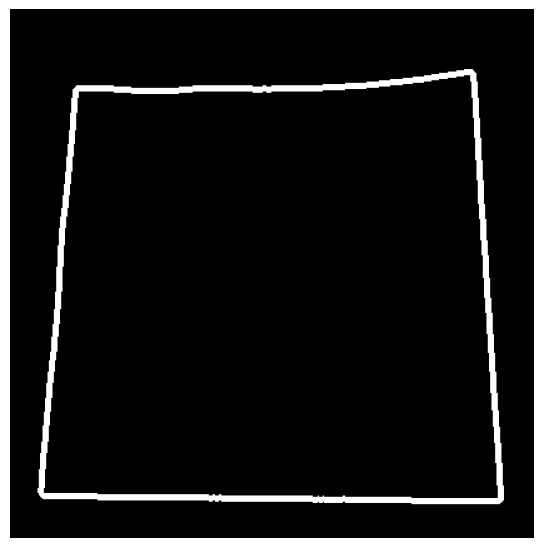

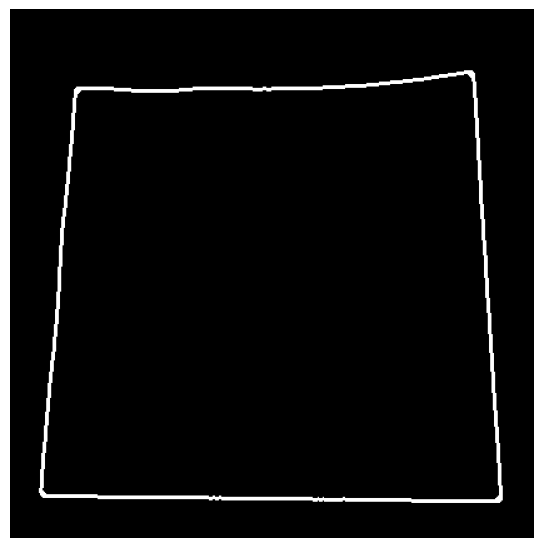

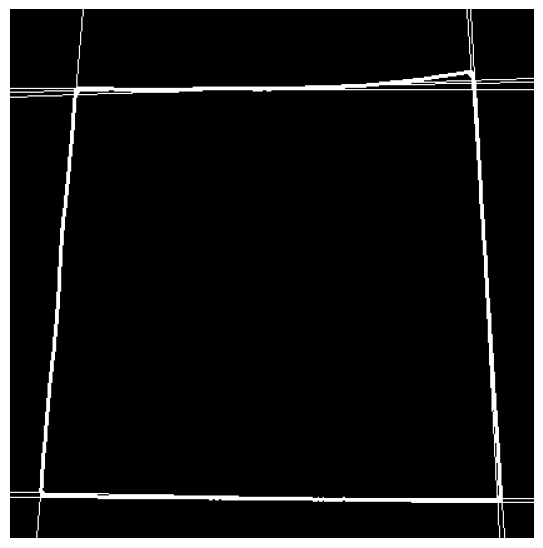

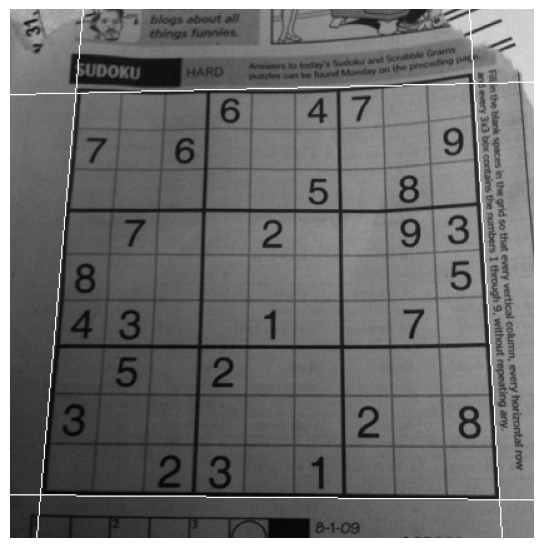

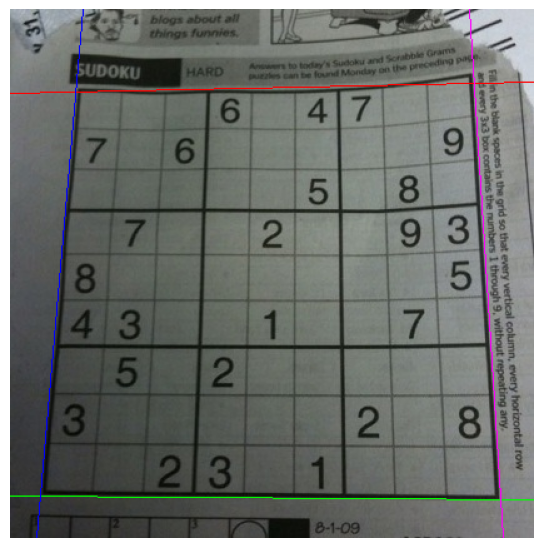

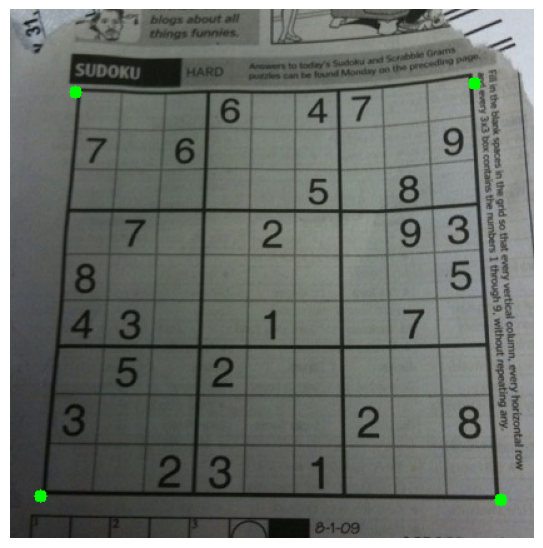

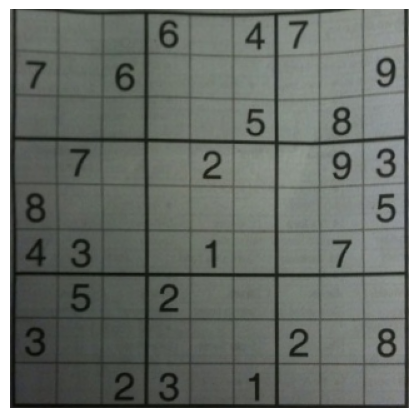

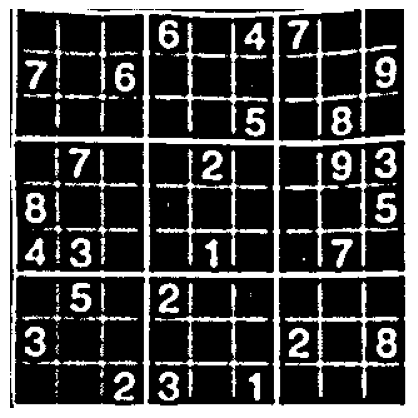

RESIZED SHAPE:  torch.Size([81, 1, 28, 28]) torch.float32 tensor([[[[-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          ...,
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246]]],


        [[[-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          ...,
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246],
          [-0.4246, -0.4246, -0.4246,  ..., -0.4246, -0.4246, -0.4246]]],


        [[[-0.4246, -0.4246, -0.4246,  .

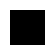

cell:  tensor(2)


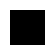

cell:  tensor(0)


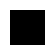

cell:  tensor(9)


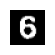

cell:  tensor(0)


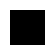

cell:  tensor(3)


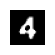

cell:  tensor(7)


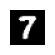

cell:  tensor(0)


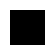

cell:  tensor(3)


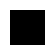

cell:  tensor(0)


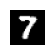

cell:  tensor(3)


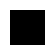

cell:  tensor(5)


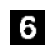

cell:  tensor(7)


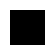

cell:  tensor(4)


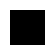

cell:  tensor(0)


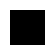

cell:  tensor(4)


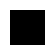

cell:  tensor(3)


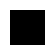

cell:  tensor(3)


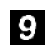

cell:  tensor(1)


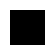

cell:  tensor(9)


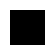

cell:  tensor(0)


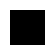

cell:  tensor(9)


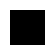

cell:  tensor(1)


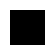

cell:  tensor(1)


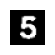

cell:  tensor(5)


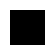

cell:  tensor(7)


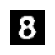

cell:  tensor(4)


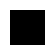

cell:  tensor(2)


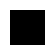

cell:  tensor(7)


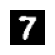

cell:  tensor(4)


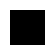

cell:  tensor(7)


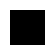

cell:  tensor(7)


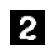

cell:  tensor(5)


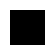

cell:  tensor(4)


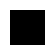

cell:  tensor(2)


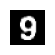

cell:  tensor(6)


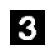

cell:  tensor(2)


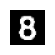

cell:  tensor(5)


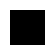

cell:  tensor(5)


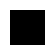

cell:  tensor(1)


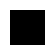

cell:  tensor(6)


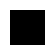

cell:  tensor(7)


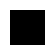

cell:  tensor(7)


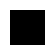

cell:  tensor(4)


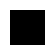

cell:  tensor(9)


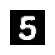

cell:  tensor(8)


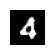

cell:  tensor(7)


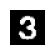

cell:  tensor(8)


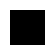

cell:  tensor(2)


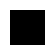

cell:  tensor(6)


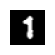

cell:  tensor(7)


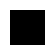

cell:  tensor(6)


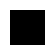

cell:  tensor(8)


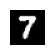

cell:  tensor(8)


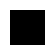

cell:  tensor(3)


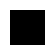

cell:  tensor(8)


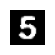

cell:  tensor(2)


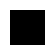

cell:  tensor(1)


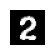

cell:  tensor(2)


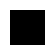

cell:  tensor(2)


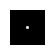

cell:  tensor(0)


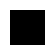

cell:  tensor(4)


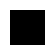

cell:  tensor(1)


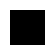

cell:  tensor(7)


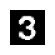

cell:  tensor(0)


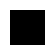

cell:  tensor(0)


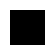

cell:  tensor(0)


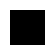

cell:  tensor(1)


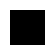

cell:  tensor(9)


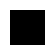

cell:  tensor(0)


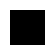

cell:  tensor(1)


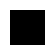

cell:  tensor(6)


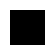

cell:  tensor(5)


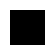

cell:  tensor(8)


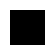

cell:  tensor(8)


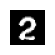

cell:  tensor(2)


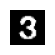

cell:  tensor(8)


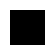

cell:  tensor(9)


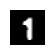

cell:  tensor(9)


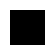

cell:  tensor(2)


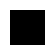

cell:  tensor(3)


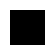

cell:  tensor(5)


In [74]:
#img = cv2.imread('v2_train/image17.jpg')
img = cv2.imread('testimg.jpg')
heightImg = img.shape[0]
widthImg = img.shape[1]
imgBlank = np.zeros((heightImg, widthImg, 3), np.uint8)
#img = cv2.imread('testimg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
# div = np.float32(gray)/(close)
# res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))

blur = cv2.GaussianBlur(gray, (11,11), 0)
#median = cv2.medianBlur(gray,3)
#blur = cv2.bilateralFilter(gray,9,75,75)


thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)

_, otsuThresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

notthresh = cv2.bitwise_not(thresh)

#kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], np.uint8)
kernel = np.ones((3,3), np.uint8)
#kernel = np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]], np.uint8)
notthreshCopy = notthresh.copy()
dilated2 = cv2.dilate(notthreshCopy, kernel, iterations=1)
opening = cv2.morphologyEx(notthresh, cv2.MORPH_OPEN, kernel)
dilated = cv2.dilate(opening, kernel, iterations=1)

#flooded = cv2.floodFill(dilated, None, (0,0), 128)

imgContours = img.copy() 
imgBigContour = img.copy()
imgBigContourApprox = img.copy()
imgJustBigContour = np.zeros((heightImg, widthImg, 1), np.uint8)
contours, hierarchy = cv2.findContours(dilated2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgContours = cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 3)

contoursSorted = sorted(contours, key=cv2.contourArea, reverse=True)
largestContour = contoursSorted[0]
imgBigContour = cv2.drawContours(imgBigContour, [largestContour], -1, (0, 255, 0), 3)
imgJustBigContour = cv2.drawContours(imgJustBigContour, [largestContour], -1, 255, 3)

#epsilon = 0.001*cv2.arcLength(largestContour,True)
#approx = cv2.approxPolyDP(largestContour,epsilon,True)

#x,y,w,h = cv2.boundingRect(largestContour)
#imgBigContourApprox = cv2.rectangle(imgBigContourApprox,(x,y),(x+w,y+h),(0,255,0),2)

kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
grid = cv2.dilate(imgJustBigContour, kernel, iterations=2)
grid = cv2.erode(grid, kernel, iterations=3)

lines = cv2.HoughLines(grid, 1, np.pi / 180, 200)

gridcopy = grid.copy()
height, width = np.shape(grid)
if lines is not None:
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        cv2.line(gridcopy, pt1, pt2, 255)

#imgBigContourApprox = cv2.drawContours(imgBigContourApprox, [approx], -1, (0, 255, 0), 3)
# if len(approx) == 4:
#     print("good")
# else:
#     print("Cannot find grid")

for current in lines:
    if current[0][0] == 0.0 and current[0][1] == -100.0:
        continue
    p1 = current[0][0]
    theta1 = current[0][1]
    pt1current = [None, None]
    pt2current = [None, None]
    #If the line is almost horizontal
    if theta1 > np.pi * 45 / 180 and theta1 < np.pi * 135 / 180:
        pt1current[0] = 0
        pt1current[1] = p1 / np.sin(theta1)
        pt2current[0] = width
        pt2current[1] = -pt2current[0] / np.tan(theta1) + p1 / np.sin(theta1)
    #If the line is almost vertical
    else:
        pt1current[1] = 0
        pt1current[0] = p1 / np.cos(theta1)
        pt2current[1] = height
        pt2current[0] = -pt2current[1] * np.tan(theta1) + p1 / np.cos(theta1)
    #Now to fuse lines
    for pos in lines:
        #if pos[0].all() == current[0].all():
        if (pos[0] == current[0]).all():
            continue
        #print("pos - curr",pos[0][0], current[0][0], "=", abs(pos[0][0] - current[0][0]), abs(pos[0][0] - current[0][0])<20000,  "   angle", pos[0][1], current[0][1], "= ", abs(pos[0][1] - current[0][1]), abs(pos[0][1] - current[0][1]) < np.pi * 170/180)
        if abs(pos[0][0] - current[0][0]) < 20 and abs(pos[0][1] - current[0][1]) < np.pi * 10 / 180:
            p = pos[0][0]
            theta = pos[0][1]
            
            pt1 = [None, None]
            pt2 = [None, None]
            # If the line is almost horizontal
            if theta > np.pi * 45 / 180 and theta < np.pi * 135 / 180:
                pt1[0] = 0
                pt1[1] = p / np.sin(theta)
                pt2[0] = width
                pt2[1] = -pt2[0] / np.tan(theta) + p / np.sin(theta)
            # If the line is almost vertical
            else:
                pt1[1] = 0
                pt1[0] = p / np.cos(theta)
                pt2[1] = height
                pt2[0] = -pt2[1] * np.tan(theta) + p / np.cos(theta)
            #If the endpoints are close to each other, merge the lines
            if (pt1[0] - pt1current[0])**2 + (pt1[1] - pt1current[1])**2 < 64**2 and (pt2[0] - pt2current[0])**2 + (pt2[1] - pt2current[1])**2 < 64**2:
                current[0][0] = (current[0][0] + pos[0][0]) / 2
                current[0][1] = (current[0][1] + pos[0][1]) / 2
                pos[0][0] = 0
                pos[0][1] = -100
                

#print("finish lines", lines)
filteredLines = np.ndarray((0, 1, 2), np.float32)
for current in lines:
    if (current[0][0] is None and current[0][1] is None) or (np.isnan(current[0][0]) and np.isnan(current[0][1])) or (current[0][0] == 0.0 and current[0][1] == -100.0):
        #print("continue")
        continue
    else:
        #print("append", current)
        filteredLines = np.append(current, filteredLines)

#print("filteredLines", np.shape(filteredLines), len(filteredLines))
filteredLines = np.reshape(filteredLines, (len(filteredLines)//2, 1, 2))
gridcopyMerged = gray.copy()

height, width = np.shape(grid)
if filteredLines is not None:
    for i in range(len(filteredLines)):
        rho = filteredLines[i][0][0]
        theta = filteredLines[i][0][1]
        print(rho, theta)
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        cv2.line(gridcopyMerged, pt1, pt2, 255, thickness=1)


topedge = [[np.inf, np.inf]]
bottomedge = [[-np.inf, -np.inf]]
leftedge = [[np.inf, np.inf]]
leftxintercept = np.inf
rightedge = [[-np.inf, -np.inf]]
rightxintercept = 0
for i in range(len(filteredLines)):
    current = filteredLines[i][0]
    p = current[0]
    theta = current[1]
    xIntercept = p * np.cos(theta)

    #If the line is nearly vertical
    if theta > np.pi * 45 / 180 and theta < np.pi * 135 / 180:
        if p < topedge[0][0]:
            topedge[0] = current[:]
        if p > bottomedge[0][0]:
            bottomedge[0] = current[:]

    #If the line is nearly horizontal
    else:
        if xIntercept > rightxintercept:
            rightedge[0] = current[:]
            rightxintercept = xIntercept
        if xIntercept <= leftxintercept:
            leftedge[0] = current[:]
            leftxintercept = xIntercept
            
def drawLine(line, img, color=255):
    height, width, *_ = np.shape(img)
    if line[0][1] != 0:
        m = -1 / np.tan(line[0][1])
        c = line[0][0] / np.sin(line[0][1])
        cv2.line(img, (0, int(c)), (width, int(m * width + c)), color)
    else:
        cv2.line(img, (line[0][0], 0), (line[0][0], height), color)
    return img

fourLines = img.copy()
fourLines = drawLine(topedge, fourLines, (255, 0, 0))
fourLines = drawLine(bottomedge, fourLines, (0, 255, 0))
fourLines = drawLine(leftedge, fourLines, (0, 0, 255))
fourLines = drawLine(rightedge, fourLines, (255, 0, 255))

def intersection(line1, line2, img):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    height, width, *_ = np.shape(img)
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    
    if (x0 < 0):
        x0 = max(0, y0 - int(np.round(rho1 / np.sin(theta1))))
    elif (x0 > width):
        x0 = min(width, y0 + int(np.round(rho1 / np.sin(theta1))))
    if (y0 < 0):
        y0 = max(0, x0 - int(np.round(rho1 / np.cos(theta1))))
    elif (y0 > height):
        y0 = min(height, x0 + int(np.round(rho1 / np.cos(theta1))))
    return [[x0, y0]]


ul = intersection(topedge, leftedge, img)
ur = intersection(topedge, rightedge, img)
bl = intersection(bottomedge, leftedge, img)
br = intersection(bottomedge, rightedge, img)

dots = img.copy()
dots = cv2.circle(dots, (ul[0][0], ul[0][1]), 5, (0,255,0), -1)
dots = cv2.circle(dots, (ur[0][0], ur[0][1]), 5, (0,255,0), -1)
dots = cv2.circle(dots, (bl[0][0], bl[0][1]), 5, (0,255,0), -1)
dots = cv2.circle(dots, (br[0][0], br[0][1]), 5, (0,255,0), -1)


box = np.array([ul, ur, bl, br], dtype=np.float32)

#distance between the points
widthBottom = np.sqrt(((br[0][0] - bl[0][0]) ** 2) + ((br[0][1] - bl[0][1]) ** 2))
widthTop = np.sqrt(((ur[0][0] - ul[0][0]) ** 2) + ((ur[0][1] - ul[0][1]) ** 2))
heightLeft = np.sqrt(((ul[0][0] - bl[0][0]) ** 2) + ((ul[0][1] - bl[0][1]) ** 2))
heightRight = np.sqrt(((ur[0][0] - br[0][0]) ** 2) + ((ur[0][1] - br[0][1]) ** 2))

minEdge = min(int(widthBottom), int(widthTop), int(heightLeft), int(heightRight))



imageBox = np.array([[0, 0],[minEdge, 0], [0, minEdge],[minEdge, minEdge]], dtype=np.float32)

warpMatrix = cv2.getPerspectiveTransform(box, imageBox)
warpedImgColored = cv2.warpPerspective(img, warpMatrix, (minEdge, minEdge))
#warpedImgBW = cv2.warpPerspective(dilated, warpMatrix, (widthImg, heightImg))
warpedImgBW = cv2.cvtColor(warpedImgColored, cv2.COLOR_BGR2GRAY)
warpedImgBW = cv2.GaussianBlur(warpedImgBW, (11, 11), 0)
warpedImgBW = cv2.adaptiveThreshold(warpedImgBW, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
warpedImgBW = cv2.bitwise_not(warpedImgBW)
kernel = np.ones((3,3), np.uint8)
#kernel = np.array([[0,1,0],[1,1,1], [0,1,0]], np.uint8)
#warpedImgBW = cv2.erode(warpedImgBW, kernel, iterations=1)
#warpedImgBW = cv2.dilate(warpedImgBW, kernel, iterations=1)

#cells = [np.hsplit(row, 9) for row in np.vsplit(warpedImgBW, 9)]

imgheight=int(warpedImgBW.shape[0])
imgwidth=int(warpedImgBW.shape[1])

y1 = 0
M = imgheight//9
N = imgwidth//9

i = 1
cells = []
for y in range(0,imgheight,M):
    for x in range(0, imgwidth, N):
        if x + (N) > imgwidth:
            #x1 = imgwidth
            x1 = x + N
            tiles = warpedImgBW[y:y1,x:x1]
            break
        else:
            x1 = x + N
        if y + (M) > imgheight:
            #y1 = imgheight
            y1 = y + M
            tiles = warpedImgBW[y:y1,x:x1] 
            break
        else:
            y1 = y + M
        tiles = warpedImgBW[y:y1,x:x1]
        cells.append(tiles)
        #display_image_in_actual_size(tiles)
cellsInit = np.array(cells)
cells = cellsInit.reshape(9,9, M,N)
cells_reshaped = cellsInit.reshape(81, 1, M,N)


for row in cells:
    for i, cell in enumerate(row):
        # kernel = np.ones((3,3), np.uint8)
        # kernel = np.array([[1,0,1],[0,0,0], [1,0,1]], np.uint8)
        # row[i] = cv2.erode(cell, kernel, iterations=1)
        # kernel = np.array([[0,1,0],[1,1,1], [0,1,0]], np.uint8)
        # row[i] = cv2.dilate(cell, kernel, iterations=1)
        cellHeight = cell.shape[0]
        cellWidth = cell.shape[1]
        #display_image_in_actual_size(row[i])
        for y in range(M):
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,0), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (0,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (cellHeight-1,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,cellWidth-1), 0)
            
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,1), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (1,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (cellHeight-2,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,cellWidth-2), 0)
        #display_image_in_actual_size(row[i])
        #np.set_printoptions(threshold=sys.maxsize)
        rowtop = None
        rowbottom = None
        colleft = None
        colright = None
        thresholdBottom = 50
        thresholdTop = 50
        thresholdLeft = 50
        thresholdRight = 50
        rows = cellHeight
        center = rows // 2
        for k in range(center, rows):
            if rowbottom is None:
                temp = row[i][k]
                if sum(temp) < thresholdBottom or k == rows-1:
                    rowbottom = k
            if rowtop is None:
                temp = row[i][rows-k-1]
                if sum(temp) < thresholdTop or k == rows-1:
                    rowtop = rows-k-1
            if colright is None:
                temp = row[i][:, k]
                if sum(temp) < thresholdRight or k == rows-1:
                    colright = k
            if colleft is None:
                temp = row[i][:, rows-k-1]
                if sum(temp) < thresholdLeft or k == rows-1:
                    colleft = rows-k-1
        # Centering the bounding box's contents
        newimg = np.zeros(np.shape(row[i]), dtype=np.uint8)
        startatX = (rows + colleft - colright)//2
        startatY = (rows - rowbottom + rowtop)//2
        for yy in range(startatY, (rows + rowbottom - rowtop)//2):
            for x in range(startatX, (rows - colleft + colright)//2):
                tempval = row[i][rowtop + yy - startatY][ colleft + x - startatX]
                newimg[yy][x] = tempval
        row[i] = newimg.copy()
        #display_image_in_actual_size(newimg)

cells_reshaped = cells.reshape(81, 1, M,N)





device = torch.device("cpu")
print(device)

df_train = pd.read_csv('./training/train.csv')
df_test = pd.read_csv('./training/test.csv')
print('Train size: ', df_train.shape)
print('Test size: ', df_test.shape)
#df_train.head()

train_data = df_train.drop('label', axis=1).values
# train_data.shape
# print(train_data.max())
train_mean = train_data.mean()/255.
train_std = train_data.std()/255.
# train_std
print('Mean: ', train_mean)
print('Std: ', train_std)

# Train-Val split
mask = np.random.rand(len(df_train)) < 0.8
df_val = df_train[~mask]
df_train = df_train[mask]
print('Train size: ', df_train.shape)
print('Val size: ', df_val.shape)
print('Test size: ', df_test.shape)
df_train.head()

ind = np.random.randint(0, df_train.shape[0]-1)
plt.imshow(df_train.iloc[ind].values[1:].reshape((28,28)), cmap='gray')
plt.title(str(df_train.iloc[ind][0]))

# Create dataset class for PyTorch
class MNISTDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, n):
        data = self.df.iloc[n]
        image = data[1:].values.reshape((28,28)).astype(np.uint8)
        label = data[0]
        if self.transform:
            image = self.transform(image)
        return (image, label)
    
# Initialize transformation, datasets, and loaders
batch_size = 16
classes = range(10)
train_transform = transforms.Compose(
                    [
                    transforms.ToPILImage(),
#                     transforms.RandomRotation(30),
                    transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1)),
                    transforms.ColorJitter(brightness=0.2, contrast=0.2),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[train_mean], std=[train_std]),
                    ])
# don't (really) need the data augmentation in validation
val_transform = transforms.Compose(
                    [
                    transforms.ToPILImage(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[train_mean], std=[train_std]),
                    ])
test_transform = val_transform

train_dataset = MNISTDataset(df_train, transform = train_transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                batch_size=batch_size,shuffle = True)
val_dataset = MNISTDataset(df_val, transform = val_transform)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                batch_size=batch_size,shuffle = False)

# sanity check for training data
imgs, lbls = next(iter(train_loader))
imgs[7].data.shape
print("Training data sanity check")
print(imgs.data.min())
print(imgs.data.max())
print(imgs.data.mean())
print(imgs.data.std())
print(classes[lbls[0]])
plt.imshow(imgs[0].data.reshape((28,28)), cmap="gray")

# sanity check for validation data
imgs, lbls = next(iter(val_loader))
imgs[0].data.shape
print("Validation data sanity check")
print(imgs.data.min())
print(imgs.data.max())
print(imgs.data.mean())
print(imgs.data.std())
print(classes[lbls[0]])
plt.imshow(imgs[0].data.reshape((28,28)), cmap="gray")

## deeper model adapted from https://www.kaggle.com/gustafsilva/cnn-digit-recognizer-pytorch
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(128, 10)
        )
                
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = F.log_softmax(x, dim=1)
        return x

# initialize CNN, cost, and optimizer
model = Model()
model.to(device)
criterion = nn.NLLLoss()   # with log_softmax() as the last layer, this is equivalent to cross entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



if os.path.isfile('./results/model.pth'):
    model.load_state_dict(torch.load('./results/model.pth'))
    optimizer.load_state_dict(torch.load('./results/optimizer.pth'))
else:
    # Some initialization work first...
    epochs = 100
    train_losses, val_losses = [], []
    train_accu, val_accu = [], []
    start_time = time.time()
    early_stop_counter = 2   # stop when the validation loss does not improve for 10 iterations to prevent overfitting
    counter = 0
    best_val_loss = float('Inf')

    for e in range(epochs):
        epoch_start_time = time.time()
        running_loss = 0
        accuracy=0
        print("Epoch: {}/{}".format(e+1, epochs))
        # training step
        model.train()
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            log_ps = model(images)
            
            ps = torch.exp(log_ps)                
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            
            loss = criterion(log_ps, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        # record training loss and error, then evaluate using validation data
        train_losses.append(running_loss/len(train_loader))
        train_accu.append(accuracy/len(train_loader))
        val_loss = 0
        accuracy=0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                log_ps = model(images)
                val_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        val_losses.append(val_loss/len(val_loader))
        val_accu.append(accuracy/len(val_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
            "Time: {:.2f}s..".format(time.time()-epoch_start_time),
            "Training Loss: {:.3f}.. ".format(train_losses[-1]),
            "Training Accu: {:.3f}.. ".format(train_accu[-1]),
            "Val Loss: {:.3f}.. ".format(val_losses[-1]),
            "Val Accu: {:.3f}".format(val_accu[-1]))

    #     print('Epoch %d / %d took %6.2f seconds' % (e+1, epochs, time.time()-epoch_start_time))
    #     print('Total training time till this epoch was %8.2f seconds' % (time.time()-start_time))
        
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            counter=0
            best_model_wts = copy.deepcopy(model.state_dict())
        else:
            counter+=1
            print('Validation loss has not improved since: {:.3f}..'.format(best_val_loss), 'Count: ', str(counter))
            if counter >= early_stop_counter:
                print('Early Stopping Now!!!!')
                model.load_state_dict(best_model_wts)
                break
            
    torch.save(model.state_dict(), './results/model.pth')
    torch.save(optimizer.state_dict(), './results/optimizer.pth')
        
    # plot training history
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    ax = plt.gca()
    ax.set_xlim([0, e + 2])
    plt.ylabel('Loss')
    plt.plot(range(1, e + 2), train_losses[:e+1], 'r', label='Training Loss')
    plt.plot(range(1, e + 2), val_losses[:e+1], 'b', label='Validation Loss')
    ax.grid(linestyle='-.')
    plt.legend()
    plt.subplot(2,1,2)
    ax = plt.gca()
    ax.set_xlim([0, e+2])
    plt.ylabel('Accuracy')
    plt.plot(range(1, e + 2), train_accu[:e+1], 'r', label='Training Accuracy')
    plt.plot(range(1, e + 2), val_accu[:e+1], 'b', label='Validation Accuracy')
    ax.grid(linestyle='-.')
    plt.legend()
    plt.show()


# prepare to predict test data - REMEMBER PRE-PROCESSING!
# I originally forgot to scale and normalize, which caused problems....

# some sanity check to make sure
x_test = df_test.values
x_test = x_test.reshape([-1, 28, 28]).astype(np.float32)
x_test = x_test/255.
x_test = (x_test-train_mean)/train_std
print(x_test.min())
print(x_test.max())
print(x_test.mean())
print(x_test.std())

# x_test = df_test.values
# x_test = x_test.reshape([-1, 28, 28]).astype(np.float)
# x_test = x_test/255.
# x_test = (x_test-train_mean)/train_std
x_test = np.expand_dims(x_test, axis=1)
x_test = torch.from_numpy(x_test).float().to(device)
# x_test.shape
print("X_TEST", x_test.type(), x_test.shape)

# prediction time!
model.eval()   # this is needed to disable dropouts
with torch.no_grad():    # turn off gradient computation because we don't need it for prediction
    ps = model(x_test)
    prediction = torch.argmax(ps, 1)
    print('Prediction',prediction)


display_image_in_actual_size(gray)
#display_image_in_actual_size(res)
display_image_in_actual_size(blur)
display_image_in_actual_size(thresh)
display_image_in_actual_size(otsuThresh)
display_image_in_actual_size(notthresh)
display_image_in_actual_size(dilated2)
display_image_in_actual_size(opening)
display_image_in_actual_size(dilated)
display_image_in_actual_size(imgContours)
display_image_in_actual_size(imgBigContour)
display_image_in_actual_size(imgBigContourApprox)
display_image_in_actual_size(imgJustBigContour)
display_image_in_actual_size(grid)
display_image_in_actual_size(gridcopy)
display_image_in_actual_size(gridcopyMerged)
display_image_in_actual_size(fourLines)
display_image_in_actual_size(dots)
display_image_in_actual_size(warpedImgColored)
display_image_in_actual_size(warpedImgBW)

cells_resized = np.array([])
for j, row in enumerate(cells_reshaped):
    for i, cell in enumerate(row):
        resized = cv2.resize(cells_reshaped[j][i], (28,28))
        cells_resized = np.append(cells_resized, resized)
        #display_image_in_actual_size(cells_reshaped[j][i])
        #display_image_in_actual_size(resized)
cells_resized = cells_resized.reshape(81, 1,28,28)
cells_resized_std = cells_resized.astype(np.double)
cells_resized_std = cells_resized_std/255.
cells_resized_std = (cells_resized_std-train_mean)/train_std
cells_resized_std = torch.from_numpy(cells_resized_std).float() #torch.tensor(cells_resized, dtype=torch.float32)
print("RESIZED SHAPE: ", cells_resized_std.shape, cells_resized_std.dtype, cells_resized_std)
        
print("CELLS SHAPE: ", cells_resized_std.shape)
# prediction time!
model.eval()   # this is needed to disable dropouts
with torch.no_grad():    # turn off gradient computation because we don't need it for prediction
    output = model(cells_resized_std)
    prediction = torch.argmax(ps, 1).to("cpu")
    print('Prediction',prediction.type(), prediction)
print("full pred ", output.data.max(1, keepdim=True))
for i, cell in enumerate(cells_resized):
    display_image_in_actual_size(cells_resized[i][0])
    print("cell: ", prediction[i])


#split image in 9x9 tiles
# tiles = [warpedImgBW[y:y+M,x:x+N] for y in range(0,imgheight,M) for x in range(0, imgwidth, N)]
# for tile in tiles:
#     display_image_in_actual_size(tile)

#display_image_in_actual_size(gray2)
#f, axarr = plt.subplots(4,1)
#axarr[0].imshow(gray, 800, cmap='gray')
#axarr[1].imshow(blur, cmap='gray')
#axarr[2].imshow(thresh, cmap='gray')
#axarr[3].imshow(otsuThresh, cmap='gray')
#for ax in axarr:
#    ax.axis('off')
#plt.xticks([]),plt.yticks([])